<a href="https://colab.research.google.com/github/sutummala/ResMHCNN/blob/main/MultiHeadConv_BT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the required libraries

In [ ]:
#import pydicom
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split

Loading the data

In [ ]:
X = np.load('/content/drive/MyDrive/Datasets/figshare-brain-tumor/x_train_224.npy')
y = np.load('/content/drive/MyDrive/Datasets/figshare-brain-tumor/y_train_224.npy')

In [ ]:
print(X.shape)
print(y.shape)
print(np.unique(y))

(2451, 224, 224, 3)
(2451,)
[0 1 2]


Splitting the data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=41)

In [ ]:
!pip install keras-multi-head
from keras_multi_head import MultiHead

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for keras-multi-head: filename=keras_multi_head-0.29.0-py3-none-any.whl size=14974 sha256=810653f1bd60c18aa41df22ebf4868cd80e36ac229e06a88430e4988b5123bf0
  Stored in directory: /root/.cache/pip/wheels/cb/23/4b/06d7ae21714f70fcc25b48f972cc8e5e7f4b6b764a038b509d
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18895 sha256=4f5e98ac83c99b63859541dedb77b8217822b2a2d677eda282a1878f2e099ee6
  Stored in directory: /root/.cache/pip/wheels/b8/f7/24/607b483144fb9c47b4ba2c5fba6b68e54aeee2d5bf6c05302e
Successfully built keras-multi-head keras-self-attention


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)        │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2D_1 (Conv2D)         │ (None, 224, 224, 64)   │          1,792 │ Input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ MaxPool2D_1               │ (None, 112, 112, 64)   │              0 │ Conv2D_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Multi-Head-1 (MultiHead)  │ (None, 112, 112, 64,   │        340,160 │ MaxPool2D_1[0][0]      │
│                           │ 3)                     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv3D_1 (Conv3D)         │ (None, 112, 112, 64,   │              4 │ Multi-Head-1[0][0]     │
│                           │ 1)                     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_add            │ (None, 112, 112, 64)   │              0 │ Conv3D_1[0][0],        │
│ (MultiHeadADD)            │                        │                │ MaxPool2D_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2D_2 (Conv2D)         │ (None, 112, 112, 64)   │         36,928 │ multi_head_add[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ MaxPool2D_2               │ (None, 56, 56, 64)     │              0 │ Conv2D_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Multi-Head-2 (MultiHead)  │ (None, 56, 56, 64, 3)  │        340,160 │ MaxPool2D_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv3D_2 (Conv3D)         │ (None, 56, 56, 64, 1)  │              4 │ Multi-Head-2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_add_1          │ (None, 56, 56, 64)     │              0 │ Conv3D_2[0][0],        │
│ (MultiHeadADD)            │                        │                │ MaxPool2D_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2D_3 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ multi_head_add_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ MaxPool2D_3               │ (None, 28, 28, 64)     │              0 │ Conv2D_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Multi-Head-3 (MultiHead)  │ (None, 28, 28, 64, 3)  │        340,160 │ MaxPool2D_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv3D_3 (Conv3D)         │ (None, 28, 28, 64, 1)  │              4 │ Multi-Head-3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_add_2          │ (None, 28, 28, 64)     │              0 │ Conv3D_3[0][0],        │
│ (MultiHeadADD)       

 Total params: 1,154,143 (4.40 MB)

 Trainable params: 1,154,143 (4.40 MB)

 Non-trainable params: 0 (0.00 B)

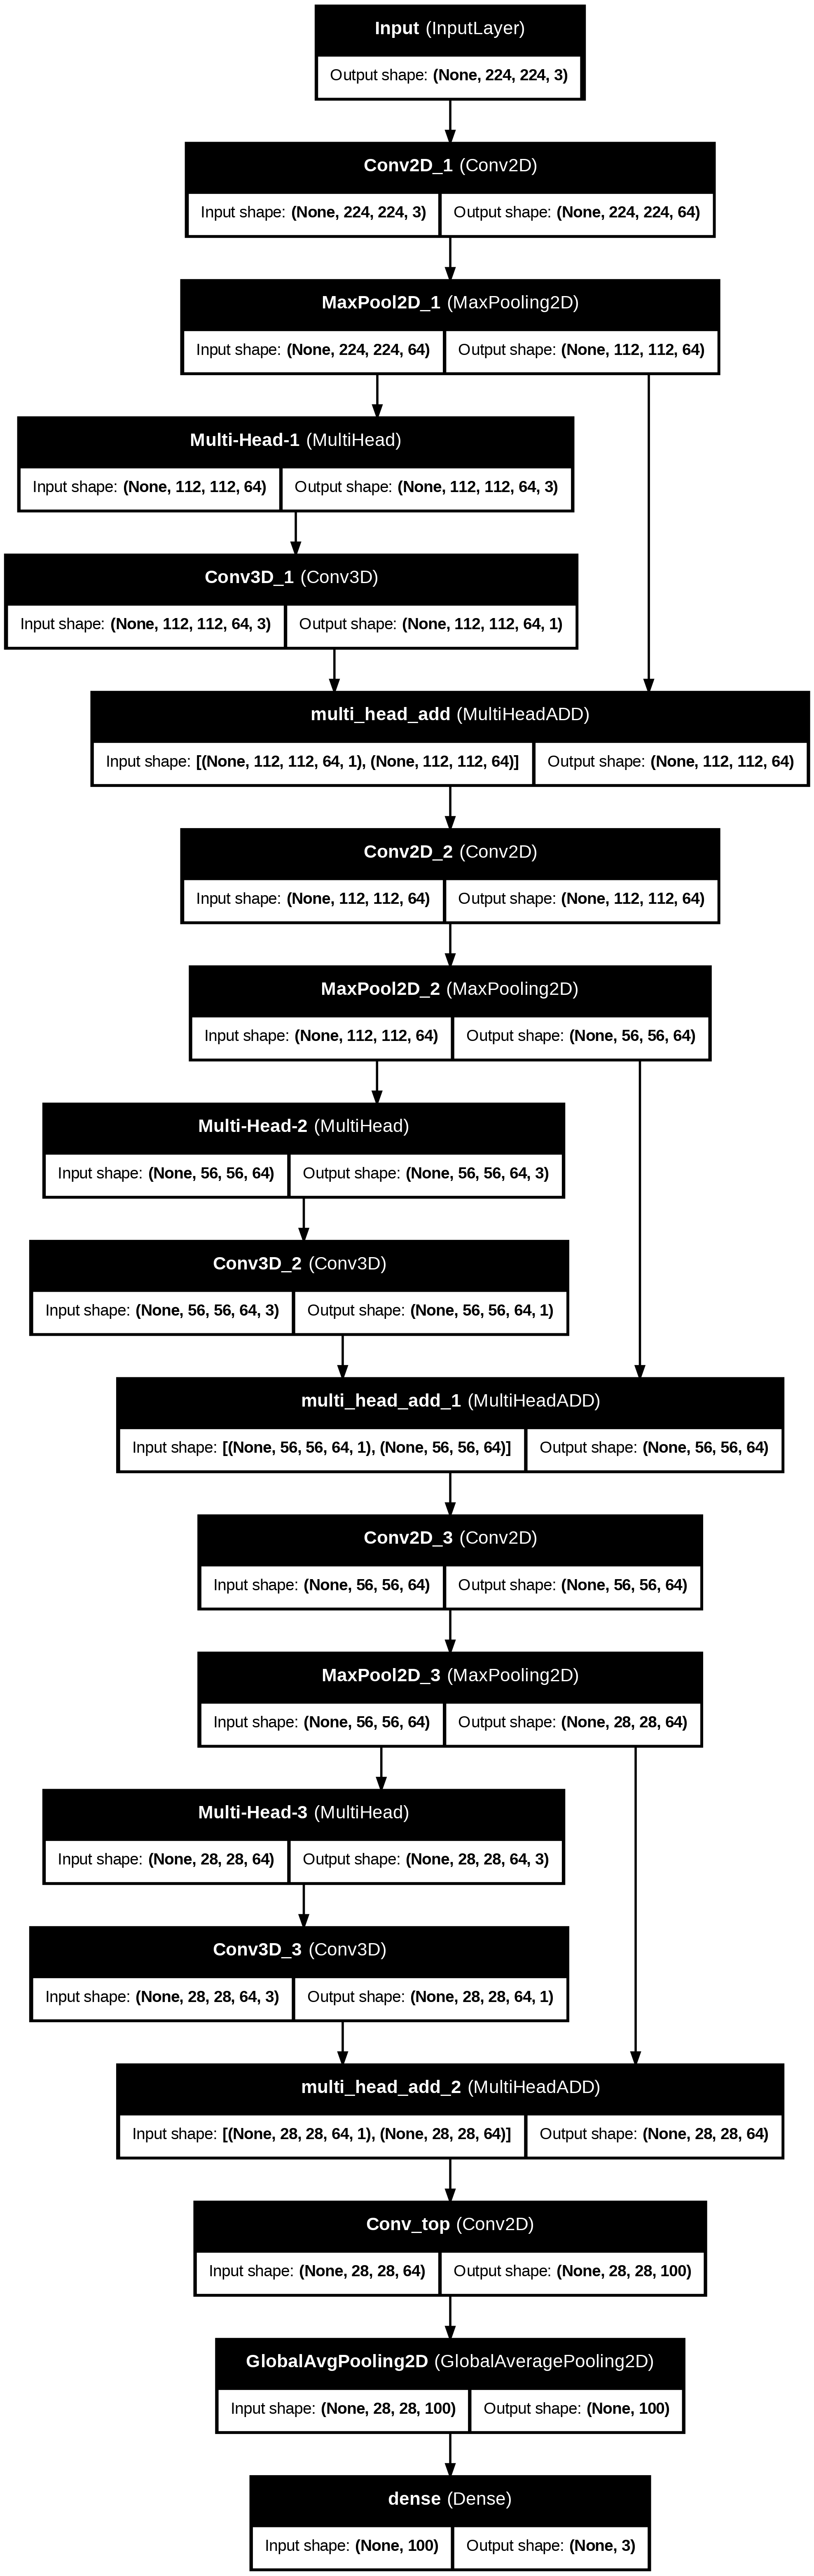

In [ ]:
class MultiHeadADD(tf.keras.layers.Layer):
  def call(self, x, y):
    return tf.squeeze(x, axis=-1) + y

IMAGE_SIZE = (224, 224, 3)
input_layer = tf.keras.Input(shape = IMAGE_SIZE, name = "Input")
#contrast_layer = tf.keras.layers.Lambda(lambda x: tf.image.central_crop(x, 0.75))(input_layer)
conv_layer_1 = tf.keras.layers.Conv2D(filters = 64, kernel_size=3, activation = 'gelu', padding='same', name = 'Conv2D_1')(input_layer)
pooling_layer_1 = tf.keras.layers.MaxPooling2D(2, 2, name='MaxPool2D_1')(conv_layer_1)
att_layer_1 = MultiHead([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=5, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation = 'gelu', padding='same'),], name='Multi-Head-1')(pooling_layer_1)
att_add_layer_1 = tf.keras.layers.Conv3D(filters=1, kernel_size=1, activation = 'gelu', padding='same', name = 'Conv3D_1')(att_layer_1)
add_layer_1 = MultiHeadADD()(att_add_layer_1, pooling_layer_1)
conv_layer_2 = tf.keras.layers.Conv2D(filters = 64, kernel_size=3, activation = 'gelu', padding='same', name = 'Conv2D_2')(add_layer_1)
pooling_layer_2 = tf.keras.layers.MaxPooling2D(2, 2, name='MaxPool2D_2')(conv_layer_2)
att_layer_2 = MultiHead([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=5, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation = 'gelu', padding='same'),], name='Multi-Head-2')(pooling_layer_2)
att_add_layer_2 = tf.keras.layers.Conv3D(filters=1, kernel_size=1, activation = 'gelu', padding='same', name = 'Conv3D_2')(att_layer_2)
add_layer_2 = MultiHeadADD()(att_add_layer_2, pooling_layer_2)
conv_layer_3 = tf.keras.layers.Conv2D(filters = 64, kernel_size=3, activation = 'gelu', padding='same', name = 'Conv2D_3')(add_layer_2)
pooling_layer_3 = tf.keras.layers.MaxPooling2D(2, 2, name='MaxPool2D_3')(conv_layer_3)
att_layer_3 = MultiHead([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=5, activation = 'gelu', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation = 'gelu', padding='same'),], name='Multi-Head-3')(pooling_layer_3)
att_add_layer_3 = tf.keras.layers.Conv3D(filters=1, kernel_size=1, activation = 'gelu', padding='same', name = 'Conv3D_3')(att_layer_3)
add_layer_3 = MultiHeadADD()(att_add_layer_3, pooling_layer_3)
conv_layer_4 = tf.keras.layers.Conv2D(filters = 100, kernel_size=3, activation = 'gelu', padding='same', name='Conv_top')(add_layer_3)
pooling_layer_4 = tf.keras.layers.GlobalAveragePooling2D(name = 'GlobalAvgPooling2D')(conv_layer_4)
prediction_layer = tf.keras.layers.Dense(units = 3, activation = 'softmax')(pooling_layer_4)
model = tf.keras.Model(inputs = input_layer, outputs = prediction_layer)
model.summary()
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adadelta(learning_rate = 0.9), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X, y, batch_size = 8, epochs = 30)

Epoch 1/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 34s 58ms/step - accuracy: 0.4550 - loss: 1.0358
Epoch 2/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.6630 - loss: 0.7506
Epoch 3/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7201 - loss: 0.6310
Epoch 4/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7445 - loss: 0.5686
Epoch 5/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7703 - loss: 0.5243
Epoch 6/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8107 - loss: 0.4765
Epoch 7/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8534 - loss: 0.3913
Epoch 8/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8566 - loss: 0.3571
Epoch 9/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8836 - loss: 0.2957
Epoch 10/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8875 - loss: 0.2793
Epoch 11/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9169 - loss: 0.2249
Epoch 12/30
307/307 ━━━━━━━━━━

In [ ]:
X_test = np.load('/content/drive/MyDrive/Datasets/figshare-brain-tumor/x_test_224.npy')
y_test = np.load('/content/drive/MyDrive/Datasets/figshare-brain-tumor/y_test_224.npy')

In [ ]:
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis = 1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step


In [ ]:
import sklearn

In [ ]:
print(f'Accuracy {sklearn.metrics.accuracy_score(y_test, y_pred)}')

if 1:
  AUC = sklearn.metrics.roc_auc_score(y_test, y_prob, average = 'weighted', multi_class='ovr')
else:
  AUC = sklearn.metrics.roc_auc_score(y_test, y_pred)
print(f'AUC is {AUC}')

target_names = ['Meningioma', 'Glioma', 'Pituitary Tumor']

print('F1-score', sklearn.metrics.f1_score(y_test, y_pred, average = 'weighted'))
print(f'Balanced accuracy {sklearn.metrics.balanced_accuracy_score(y_test, y_pred)}')
#print('Average-precision-score', sklearn.metrics.average_precision_score(y_test, y_prob, average = 'weighted'))
print(f'MCC {sklearn.metrics.matthews_corrcoef(y_test, y_pred)}')
print(f'{sklearn.metrics.classification_report(y_test, y_pred, target_names=target_names)}')
#print(f'{sklearn.metrics.precision_recall_fscore_support(y_test, y_prob)}')

Accuracy 0.9690048939641109
AUC is 0.9977605704679118
F1-score 0.9690720740260869
Balanced accuracy 0.9666488582187842
MCC 0.9507617139421758
                 precision    recall  f1-score   support

     Meningioma       0.93      0.94      0.93       136
         Glioma       0.99      0.97      0.98       302
Pituitary Tumor       0.97      0.99      0.98       175

       accuracy                           0.97       613
      macro avg       0.96      0.97      0.96       613
   weighted avg       0.97      0.97      0.97       613



[[0.94117647 0.02941176 0.02941176]
 [0.02649007 0.97019868 0.00331126]
 [0.01142857 0.         0.98857143]]


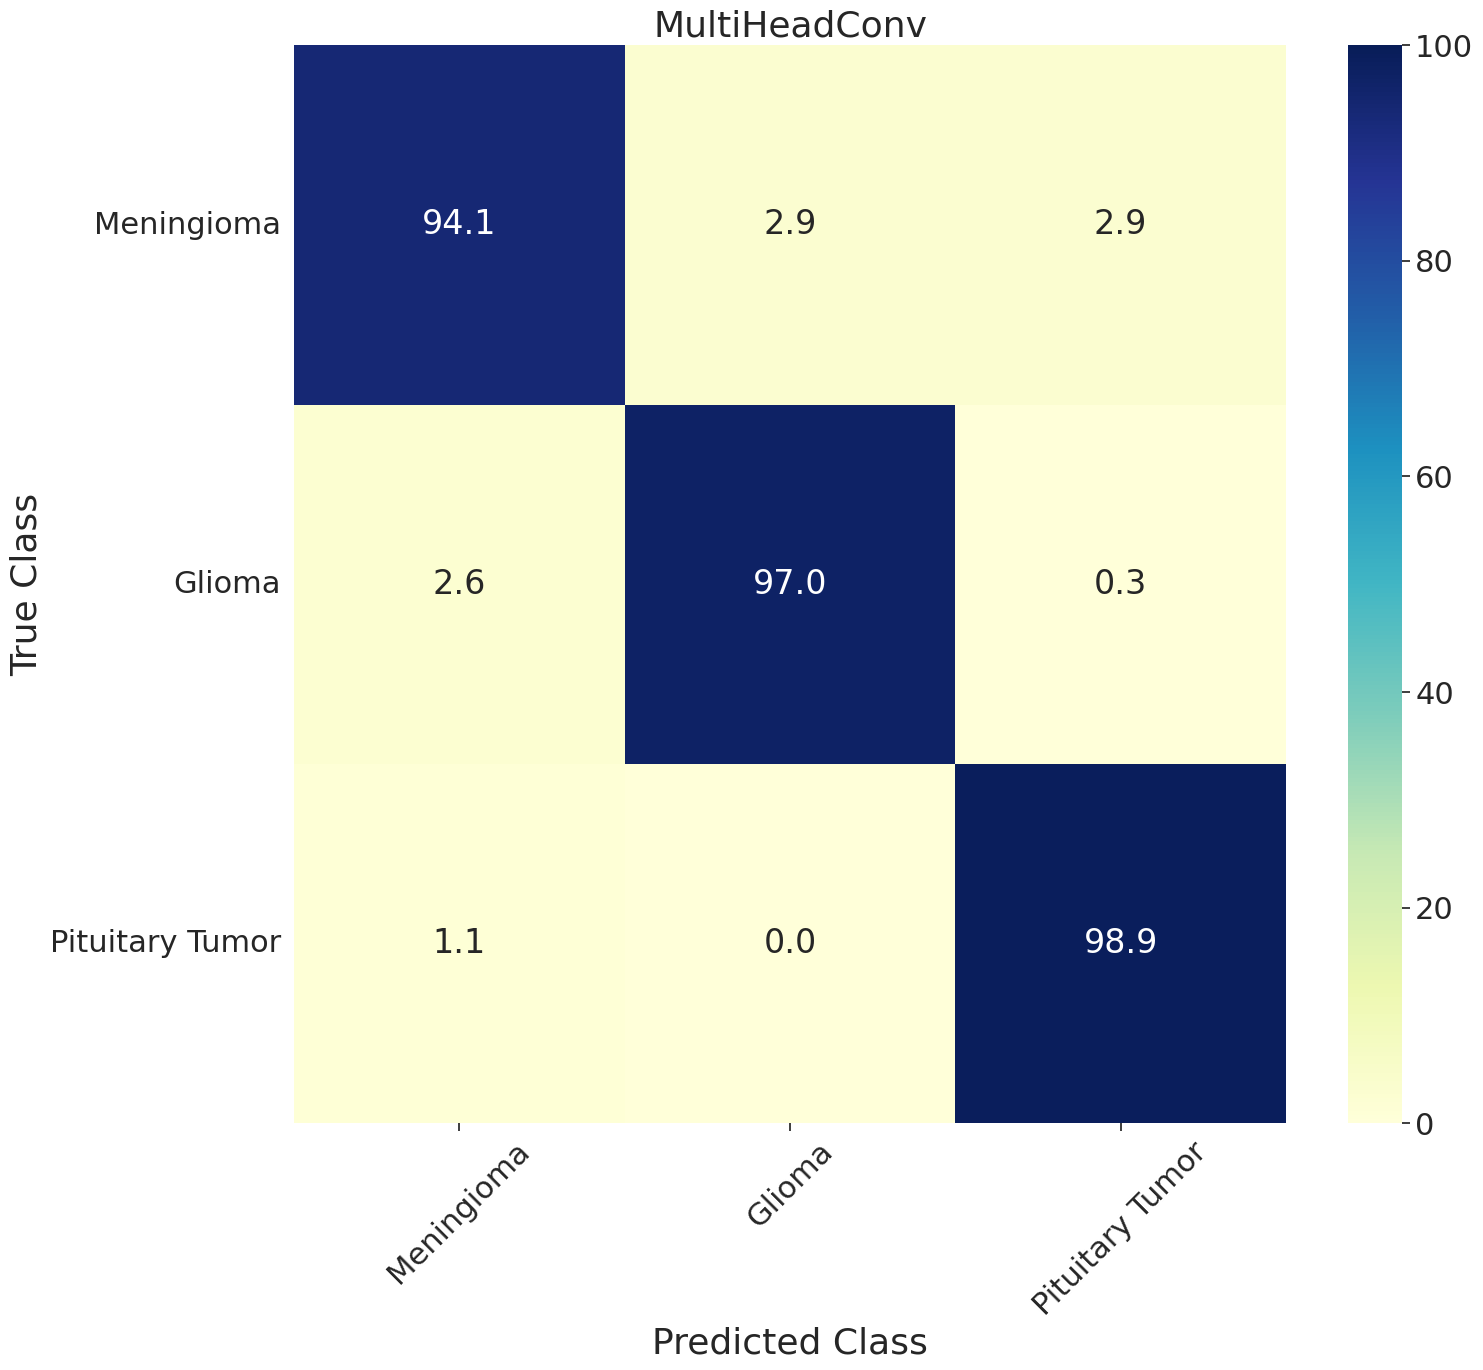

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion_mat = confusion_matrix(y_test, y_pred, normalize = 'true')

if 1:
  class_names = ['Meningioma', 'Glioma', 'Pituitary Tumor']
else:
  class_names = ['Bad', 'Good']
print(confusion_mat)

# Plotting multilabel confusion matrix in a beautiful manner
sns.set(font_scale=2)
if 1:
  fig = plt.figure(figsize=(16, 14))
else:
  fig = plt.figure(figsize = (8,6))
ax= plt.subplot()
sns.heatmap(confusion_mat*100, annot=True, vmin = 0, vmax = 100, ax = ax, cmap = 'YlGnBu', fmt = '2.1f'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted Class', fontsize=26)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=45)
ax.xaxis.set_ticklabels(class_names, fontsize = 22)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Class', fontsize=26)
ax.yaxis.set_ticklabels(class_names, fontsize = 22)
plt.yticks(rotation=0)

plt.title('MultiHeadConv', fontsize=26)

plt.show()